# Iris Flower Identification Using Support Vector Classifier

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set_style('whitegrid')

# Use seaborn to get the iris data by using: iris = sns.load_dataset('iris')
iris = sns.load_dataset('iris')

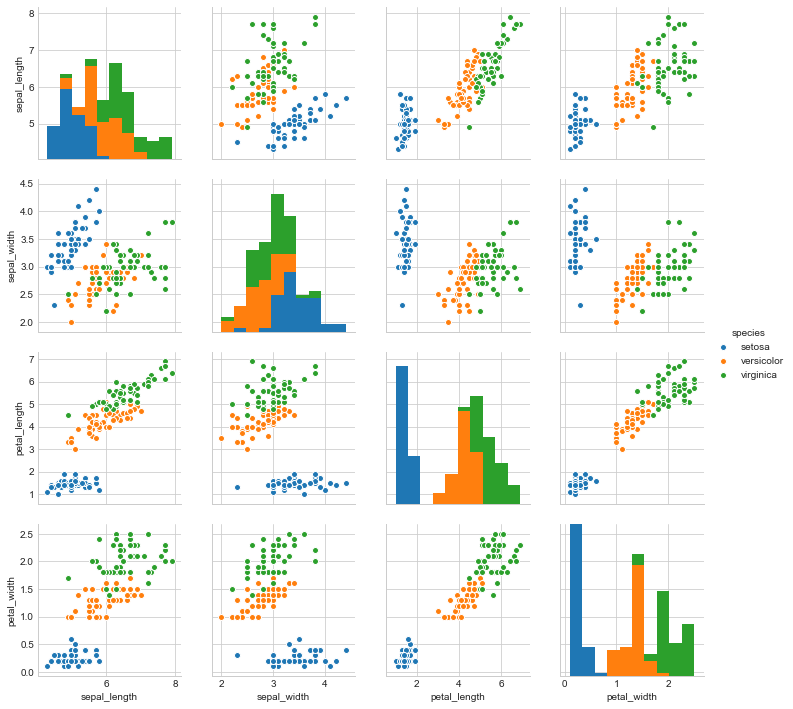

In [2]:
# Create a pairplot of the data set.
sns.pairplot(data = iris, hue = 'species')
plt.show()

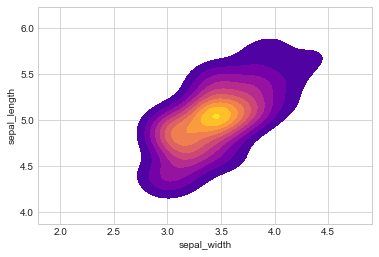

In [3]:
# Create a kde plot of sepal_length versus sepal width for setosa species of flower.
setosa = iris[iris['species'] == 'setosa']
sns.kdeplot(setosa['sepal_width'], setosa['sepal_length'], cmap = 'plasma', shade=True,
           shade_lowest=False)
plt.show()

In [4]:
# Create independent variables
X = iris.drop('species', axis=1)

# Create dependent variables
y = iris['species']

# Use train_test_split
from sklearn.model_selection import train_test_split

# Split the data into training set and testing set and set test_size = 0.3 and random_state = 11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import SVC
from sklearn.svm import SVC

# Create an instance of SVC() called model
model = SVC()

# Train/fit model on the training data.
model.fit(X_train, y_train)

# Use mdoel.predict() to predict off the X_test set of the data.
predictions = model.predict(X_test)

In [5]:
# Create a classification report for the model.
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.94      0.97        18
  virginica       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



In [6]:
#Create a confusion matrix for the model.
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [7]:
# Import GridsearchCV from SciKit Learn.
from sklearn.model_selection import GridSearchCV

# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C':[0.1, 1, 10, 100], 'gamma':[1,0.1,0.01,0.001]}

# Create a GridSearchCV object and fit it to the training data.
grid = GridSearchCV(SVC(), param_grid, verbose = 2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ..................................... C=1, gamma=1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ................................... C=1, gamma=0.1, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [8]:
# Use grid.predict() to predict off the X_test set of the data.
grid_predictions = grid.predict(X_test)

In [9]:
# Show best parameters
grid.best_params_

{'C': 100, 'gamma': 0.1}

In [10]:
# Create a classification report from the results.
print(classification_report(y_test, grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.89      0.94        18
  virginica       0.85      1.00      0.92        11

avg / total       0.96      0.96      0.96        45



In [11]:
# Create a confusion matrix from the results.
print(confusion_matrix(y_test, grid_predictions))

[[16  0  0]
 [ 0 16  2]
 [ 0  0 11]]


In [12]:
# Create a dictionary called param_grid and fill out some parameters for C and gamma.
param_grid = {'C':[0.1, 1, 10, 75, 100, 125], 'gamma':[1, 0.5, 0.1, 0.05, 0.01,0.001]}

# Create a GridSearchCV object and fit it to the training data.
grid = GridSearchCV(SVC(), param_grid, verbose = 2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ................................. C=0.1, gamma=0.5, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ................................. C=0.1, gamma=0.5, total=   0.0s
[CV] C=0.1, gamma=0.5 ................................................
[CV] ................................. C=0.1, gamma=0.5, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ................................ C=0.1, gamma=0.05, total=   0.0s
[CV] C=0.1, gamma=0.05 ...............................................
[CV] ................................ C=0.1, gamma=0.05, total=   0.0s
[CV] C=0.1, gamma=0.05 ...............................................
[CV] ................................ C=0.1, gamma=0.05, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................................ C=0.1, gamma=0.01, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] 

[CV] C=75, gamma=0.001 ...............................................
[CV] ................................ C=75, gamma=0.001, total=   0.0s
[CV] C=75, gamma=0.001 ...............................................
[CV] ................................ C=75, gamma=0.001, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=0.5 ................................................
[CV] ................................. C=100, gamma=0.5, total=   0.0s
[CV] C=100, gamma=0.5 ................................................
[CV] ................................. C=100, gamma=0.5, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    1.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 75, 100, 125], 'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [13]:
# Use grid.predict() to predict off the X_test set of the data.
grid_predictions = grid.predict(X_test)

# Show best parameters
grid.best_params_

{'C': 10, 'gamma': 0.05}

In [14]:
# Create a classification report from the results.
print(classification_report(y_test, grid_predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      0.94      0.97        18
  virginica       0.92      1.00      0.96        11

avg / total       0.98      0.98      0.98        45



In [15]:
# Create a confusion matrix from the results.
print(confusion_matrix(y_test, grid_predictions))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
